## 数学建模常用代码整理

### 数据处理类

替换列名

- 地区→城市，并去掉每个名称里的"市"字

In [41]:
import pandas as pd

In [6]:
df = pd.read_excel(r'E:\浏览器下载\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\杂\新增指标.xlsx')

df['地区'] = df['地区'].str.replace('市', '', regex=False)
df.rename(columns={'地区': '城市'}, inplace=True)

df.to_csv('新增指标.csv', index=False)

合并新列
- 加入两列数据

In [5]:
df = pd.read_csv('./C题/新增博物馆.csv')
newdf = pd.read_csv('./新增指标.csv')

# 创建字典以便快速查找
dictory = dict(zip(newdf['城市'], zip(newdf['接待入境旅游者人数（万人次）'], newdf['国际旅游外汇收入（万美元）'])))

# 定义新的列
df['接待入境旅游者人数（万人次）'] = 0
df['国际旅游外汇收入（万美元）'] = 0

# 填充数据
for index, row in df.iterrows():
    city = row['城市']
    if city in dictory:
        df.at[index, '接待入境旅游者人数(万人次)'] = dictory[city][0]
        df.at[index, '国际旅游外汇收入(万美元)'] = dictory[city][1]

df.to_csv('更新后的新增博物馆.csv', index=False)
               

去除原有列

In [17]:
import pandas as pd

# 读取数据
df = pd.read_csv('./杂/processed_data.csv')

# 去除"地区"列
df = df.drop(columns=['地区'])

# 保存至新的 CSV 文件
df.to_csv('final_data_without_district.csv', index=False)

合并多个CSV文件
- 合并'美食'文件夹里的所有CSV文件到一个新的CSV文件
- 合并两个CSV文件到新的CSV文件
- 列名不同但是对应的两个CSV文件合并

In [7]:
import os
import csv

def merge_csv_files(input_folder, output_file):
    # 获取所有CSV文件的路径
    csv_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.csv')]

    # 初始化一个空列表来存储所有行
    all_rows = []

    # 遍历每个CSV文件
    for file in csv_files:
        with open(file, newline='', encoding='utf-8') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                all_rows.append(row)

    # 写入合并后的CSV文件
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        for row in all_rows:
            writer.writerow(row)

    print(f"所有CSV文件已合并到 {output_file}")

# 调用函数，合并'美食'文件夹里的所有CSV文件到一个新的CSV文件
merge_csv_files('./C题/美食', 'merged_city_items.csv')

所有CSV文件已合并到 merged_city_items.csv


In [11]:
import csv

def read_csv_to_dict(file_path, key_column):
    data_dict = {}
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            data_dict[row[key_column]] = row
    return data_dict

def write_dict_to_csv(data_dict, fieldnames, output_file):
    with open(output_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for row in data_dict.values():
            writer.writerow(row)

def merge_csv_files(existing_file, new_file, output_file):
    # 读取两个CSV文件到字典
    existing_data = read_csv_to_dict(existing_file, '城市')
    new_data = read_csv_to_dict(new_file, '城市')

    # 将new_data的total_items列合并到existing_data中
    for city, data in new_data.items():
        if city in existing_data:
            existing_data[city]['餐馆数'] = data['餐馆数']
        else:
            # 如果existing_data中没有这个城市的数据，添加新数据
            existing_data[city] = data

    # 获取字段名（列名），并确保'total_items'在其中
    fieldnames = list(existing_data[next(iter(existing_data))].keys())
    if '餐馆数' not in fieldnames:
        fieldnames.append('餐馆数')

    # 将合并后的数据写入到新的CSV文件
    write_dict_to_csv(existing_data, fieldnames, output_file)
    print(f"CSV文件已合并到 {output_file}")

# 调用函数，合并CSV文件
merge_csv_files('./杂/新增入境指标.csv', './杂/merged_city_items.csv', 'final_merged_data.csv')

CSV文件已合并到 final_merged_data.csv


In [12]:
import pandas as pd

# 读取 CSV 文件
passenger_data = pd.read_csv('C题/中间过程/省份对应客运量.csv')
final_data = pd.read_csv('第二问/final_merged_data.csv')

# 两个数据框都有一个共同的列来进行合并，'省份'
merged_data = pd.merge(final_data, passenger_data, left_on='省份', right_on='地区', how='left')

# 保存合并后的数据
merged_data.to_csv('全合并.csv', index=False)

In [54]:
import pandas as pd

# 读取三个CSV文件
file2 = pd.read_csv(r'E:\浏览器下载\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\top_50_cities.csv')
file1 = pd.read_csv(r'E:\浏览器下载\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\排名第一景点(按游玩时间排序).csv')
file3 = pd.read_csv(r'E:\浏览器下载\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\C题\top50经纬度信息.csv')

# 处理第一个文件，只保留城市、景点、游玩时间
file1_filtered = file1[['城市', '景点', '游玩时间', '门票价格']]

# 处理第二个文件，只保留城市、TOPSIS_Score、门票价格
file2_filtered = file2[['城市', 'TOPSIS_Score']]

# 处理第三个文件，只保留城市、Latitude、Longitude
file3_filtered = file3[['城市', 'Latitude', 'Longitude']]

# 合并三个数据框
merged_data = pd.merge(file1_filtered, file2_filtered, on='城市', how='outer')
merged_data = pd.merge(merged_data, file3_filtered, on='城市', how='outer')

# 导出整合后的结果为CSV文件
merged_data.to_csv('整合后的城市信息.csv', index=False)

导出列

In [28]:
# 导出第一列
first_column = df.iloc[:, 0]  # 获取第一列
first_column.to_csv('top50.csv', index=False, header=True)  # 导出为 CSV 文件

以下导出方式要记得设置index=False参数，否则会包含索引列

In [38]:
pf = df['城市']
pd.to_csv('top502.csv')

In [39]:
pf = df['城市']
pd.to_csv('top501.csv', index=False)

计数

In [44]:
df = pd.read_csv('./杂/部分城市.csv')
cnt = df['城市'].value_counts()
cnt

城市
广州     30
上海     30
苏州     30
天津     30
南京     30
珠海     30
重庆     30
成都     30
宁波     30
福州     30
沈阳     30
泉州     30
南通     30
徐州     30
惠州     30
长沙     30
三亚     30
张家界    30
绍兴     30
临沂     30
潍坊     30
大连     30
合肥     30
佛山     16
青岛     15
杭州     15
哈尔滨    15
厦门     15
北京     15
深圳     15
东莞     15
常州     15
巢湖     15
江门     15
桂林     15
郑州     15
宝鸡     15
无锡     15
西安     15
温州     15
烟台     15
嘉兴     15
昆明     15
济南     15
金华     15
洛阳     15
中山     15
黄山     15
Name: count, dtype: int64

In [47]:
# 查看不同城市的类别数量
num_unique_cities = df['城市'].nunique()
print(f"不同城市的数量: {num_unique_cities}")

不同城市的数量: 48


### 数据检查类

In [13]:
# 检查缺失值
missing_values = merged_data.isnull().sum()

# 打印缺失值的统计信息
print(missing_values[missing_values > 0])

平均气温        4
累积降水        4
累积日照        4
平均湿度        4
PM2.5      40
PM10       40
博物馆数(个)    69
dtype: int64


In [15]:
pf = pd.read_csv('./杂/processed_data.csv')

# 检查是否有缺失值
has_missing = pf.isnull().values.any()

# 输出结果
if has_missing:
    print("DataFrame 中有缺失值。")
else:
    print("DataFrame 中没有缺失值。")

DataFrame 中没有缺失值。


In [16]:
import pandas as pd

# 读取数据
df = pd.read_csv('./杂/processed_data.csv')

# 判断每一行的"地区"和"省份"是否相等
all_match = (df['地区'] == df['省份']).all()

# 输出结果
if all_match:
    print("所有的地区和省份值都相等。")
else:
    print("并非所有的地区和省份值都相等。")

所有的地区和省份值都相等。


In [22]:
df = pd.read_csv('第二问/数据预处理.csv')

# 查看 DataFrame 的描述性统计
stats = df.describe()
stats

,景点数,最高评分,平均气温,累积降水,累积日照,平均湿度,PM2.5,PM10,博物馆数(个),接待入境旅游者人数(万人次),国际旅游外汇收入(万美元),餐馆数,公共汽电车累计,出租汽车累计,城市轨道交通累计,城市客运轮渡累计
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,343.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.565991,0.989709,0.718128,0.653763,0.489603,0.677898,0.688974,0.689075,0.048181,0.028820,0.027119,0.067874,0.042087,0.018798,0.033519,0.031025
std,0.219160,0.093721,0.210512,0.217050,0.241687,0.175151,0.129243,0.139767,0.082707,0.092916,0.096210,0.130548,0.129307,0.085022,0.090967,0.120136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.432990,1.000000,0.544715,0.493455,0.314655,0.595320,0.595238,0.590604,0.004132,0.000000,0.000000,0.013928,0.003095,0.001042,0.003999,0.000427
50%,0.567010,1.000000,0.782409,0.688027,0.472563,0.676509,0.690476,0.691275,0.024793,0.002263,0.001090,0.027729,0.006448,0.001972,0.005904,0.002636
75%,0.734536,1.000000,0.892410,0.829349,0.710925,0.808199,0.785714,0.798658,0.053719,0.016868,0.010766,0.055222,0.013476,0.004266,0.013106,0.006852
max,1.000000,1.000000,0.998991,0.997080,1.000000,0.998795,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# 定位缺失值的位置
missing_positions = np.where(df.isnull())

# 输出缺失值的位置及内容
if missing_positions[0].size > 0:
    print("缺失值的位置及内容：")
    for row, col in zip(missing_positions[0], missing_positions[1]):
        print(f"行: {row}, 列: {df.columns[col]}, 内容: {df.iat[row, col]}")
else:
    print("DataFrame 中没有缺失值。")

缺失值的位置及内容：
行: 93, 列: 国际旅游外汇收入(万美元), 内容: nan


In [25]:
# 检查乌鲁木齐对应行是否有缺失值
row_nan_check = df[df['城市'] == '保山'].isnull().any().any()

# 输出结果
if row_nan_check:
    print("保山的行中有缺失值。")
else:
    print("保山的行中没有缺失值。")

保山的行中没有缺失值。


In [49]:
import pandas as pd

# 读取第一个 CSV 文件
df1 = pd.read_csv('./C题/8.5整理后的文件.csv')  # 替换为你的文件名
cities1 = df1['城市'].unique()

# 读取第二个 CSV 文件
df2 = pd.read_csv('top50经纬度信息.csv')  # 替换为你的文件名
cities2 = df2['城市'].unique()

# 比较两个城市列表
unique_in_df1 = set(cities1) - set(cities2)  # 只在第一个文件中的城市
unique_in_df2 = set(cities2) - set(cities1)  # 只在第二个文件中的城市

print("只在第一个文件中的城市:")
print(unique_in_df1)

print("\n只在第二个文件中的城市:")
print(unique_in_df2)

只在第一个文件中的城市:
{'黔南', '韶关', '宜宾', '和田', '六盘水', '石嘴山', '漳州', '三门峡', '通辽', '乐东', '梧州', '大庆', '潜江', '辽源', '迪庆', '宿州', '通化', '保山', '赤峰', '晋城', '怀化', '吴忠', '宁德', '长治', '北屯', '开封', '百色', '鞍山', '资阳', '铜川', '泸州', '商洛', '安阳', '昌吉', '威海', '普洱', '潮州', '喀什', '沧州', '东营', '菏泽', '河源', '延安', '乌兰察布', '阳泉', '林芝', '南昌', '南宁', '阿克苏', '永州', '日照', '宿迁', '黔东南', '武威', '岳阳', '德宏', '商丘', '万宁', '呼伦贝尔', '昌江', '鄂尔多斯', '五家渠', '汕尾', '贵港', '鹤岗', '锡林郭勒盟', '克拉玛依', '扬州', '临沧', '佳木斯', '芜湖', '朔州', '承德', '晋中', '金昌', '齐齐哈尔', '自贡', '连云港', '本溪', '云浮', '嘉峪关', '汕头', '怒江', '神农架', '阜阳', '伊春', '文山', '常德', '恩施', '塔城', '北海', '揭阳', '东方', '唐山', '蚌埠', '泰安', '抚州', '龙岩', '天门', '鄂州', '忻州', '萍乡', '克孜勒苏柯尔克孜', '衡阳', '红河', '银川', '株洲', '宣城', '六安', '白银', '青木川', '益阳', '钦州', '黔西南', '湖州', '儋州', '德州', '焦作', '保亭', '湘西', '大理', '白城', '舟山', '博尔塔拉', '遵义', '临高', '攀枝花', '保定', '莆田', '巴音郭楞', '吕梁', '吉林市', '九江', '淮北', '周口', '吉安', '天水', '鸡西', '濮阳', '乐山', '湛江', '驻马店', '淮安', '贺州', '滁州', '德阳', '梅州', '济宁', '广元', '达州', '日喀则', '清远', '鹰潭', '荆州', '安顺', '琼海', '玉溪', '防城港'

In [55]:
city_count = merged_data['城市'].nunique()
print(f'城市数量: {city_count}')

# 检查是否有重复的城市
duplicate_cities = merged_data[merged_data.duplicated(subset=['城市'], keep=False)]
if not duplicate_cities.empty:
    print('重复的城市:')
    print(duplicate_cities[['城市']])
else:
    print('没有重复的城市')

城市数量: 50
没有重复的城市


### 数据处理类

In [51]:
import pandas as pd

# 读取数据
data = pd.read_csv('整理结果前三.csv')

# 将游玩时间列转换为数值类型
data['游玩时间'] = pd.to_numeric(data['游玩时间'], errors='coerce')

# 用均值填补缺失值
data['游玩时间'].fillna(data['游玩时间'].mean(), inplace=True)

# 按照排名进行排序
data_sorted = data.sort_values(by=['排名', '游玩时间', '晚上/全天可玩'], ascending=[True, True, False])

# 确保每个城市只有一个景点，选择排名最前的
selected_per_city = data_sorted.groupby('城市').first().reset_index()

# 最终结果按照游玩时间排序
final_selection = selected_per_city.sort_values(by='游玩时间')

# 导出结果为CSV文件
final_selection.to_csv('排名第一景点(按游玩时间排序).csv', index=False)

C:\Users\25705\AppData\Local\Temp\ipykernel_34560\1079721295.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['游玩时间'].fillna(data['游玩时间'].mean(), inplace=True)


In [53]:
city_count = final_selection['城市'].nunique()
print(f'城市数量: {city_count}')

# 检查是否有重复的城市
duplicate_cities = final_selection[final_selection.duplicated(subset=['城市'], keep=False)]
if not duplicate_cities.empty:
    print('重复的城市:')
    print(duplicate_cities[['城市']])
else:
    print('没有重复的城市')

城市数量: 50
没有重复的城市


In [56]:
import pandas as pd

# 读取数据
data = pd.read_csv('整理结果前三.csv')

# 数据预处理：用门票均值填补缺失值
data['门票价格'] = data['门票价格'].replace(-1, pd.NA)  # 将-1视为缺失值
data['门票价格'].fillna(data['门票价格'].mean(), inplace=True)

# 转换游玩时间为浮点数
data['游玩时间'] = pd.to_numeric(data['游玩时间'], errors='coerce')

# 筛选每个城市门票最低的景点
def get_lowest_ticket(group):
    # 先按门票价格排序，再按游玩时间排序
    sorted_group = group.sort_values(by=['门票价格', '游玩时间'], ascending=[True, True])
    return sorted_group.head(1)

result = data.groupby('城市').apply(get_lowest_ticket).reset_index(drop=True)

# 导出成CSV文件
result.to_csv('最低门票景点.csv', index=False)

C:\Users\25705\AppData\Local\Temp\ipykernel_34560\2318607990.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['门票价格'].fillna(data['门票价格'].mean(), inplace=True)
C:\Users\25705\AppData\Local\Temp\ipykernel_34560\2318607990.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['门票价格'].fillna(data['门票价格'

In [57]:
import pandas as pd

df = pd.read_csv(r'E:\浏览器下载\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\2024年第五届“华数杯”全国大学生数学建模竞赛赛题\C题\cities_with_coordinates.csv')

# 假设df是你的DataFrame
# 打印原始的DataFrame
print("原始的DataFrame:")
print(df)

# 去除第一列，不修改原始DataFrame
new_df = df.drop(df.columns[0], axis=1)

# 打印去除第一列后的DataFrame
print("\n去除第一列后的DataFrame:")
print(new_df)

# 将新的DataFrame保存为CSV文件
# 这里'your_filename.csv'是你想要保存的文件名
csv_file_path = 'your_filename.csv'
new_df.to_csv(csv_file_path, index=False)  # 设置index=False以避免将索引也保存到文件中

print(f"\nDataFrame已保存为CSV文件：{csv_file_path}")

原始的DataFrame:
     Unnamed: 0   城市    名字     票价   Latitude   Longitude
0             0  七台河   石龙山   15.0  45.771178  131.003015
1             1   上饶    圭峰    8.0  28.455130  117.943064
2             2   中山   虎逊岩  198.0  22.517024  113.392517
3             3   临沂   天宝山   80.1  35.103771  118.356464
4             4   临沧    佤山   60.0  23.884175  100.088837
..          ...  ...   ...    ...        ...         ...
101         101   黄山  西海群峰  190.0  29.714886  118.337643
102         102   黄石   龙角山  118.0  30.201082  115.038999
103         103  黔东南   金钟山    0.0  26.583759  107.982838
104         104   黔南   福泉山   54.0  26.253136  107.522303
105         105   龙岩   梅花山    9.3  25.075884  117.017362

[106 rows x 6 columns]

去除第一列后的DataFrame:
      城市    名字     票价   Latitude   Longitude
0    七台河   石龙山   15.0  45.771178  131.003015
1     上饶    圭峰    8.0  28.455130  117.943064
2     中山   虎逊岩  198.0  22.517024  113.392517
3     临沂   天宝山   80.1  35.103771  118.356464
4     临沧    佤山   60.0  23.884175  

### 画图类

图表已保存为 top_50_cities_ranking.png


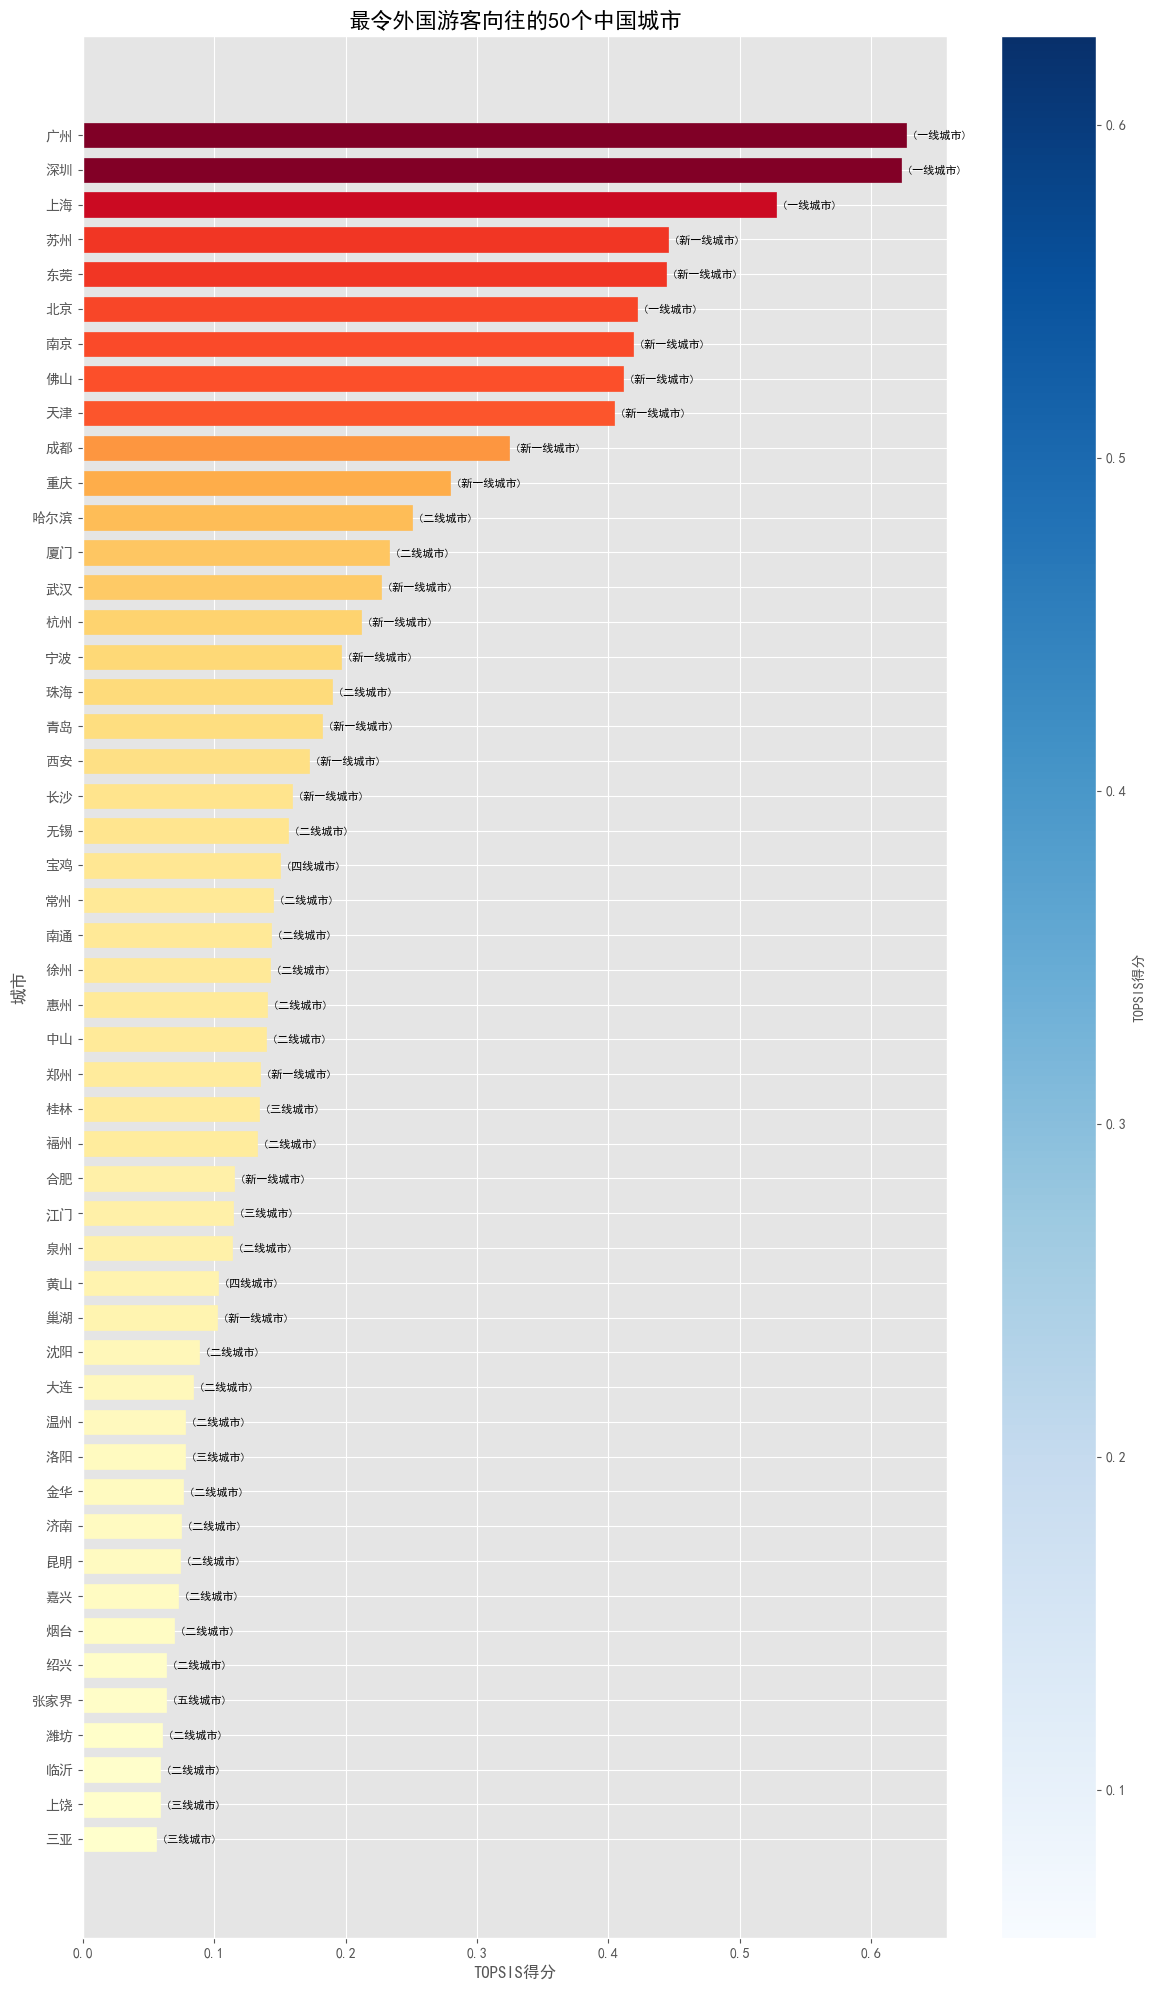

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

plt.rcParams['font.sans-serif'] = [u'simHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取之前生成的CSV文件
df = pd.read_csv('./top_50_cities.csv')

# 对城市进行排序
df = df.sort_values('TOPSIS_Score', ascending=True)

# 设置图表样式
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 20))

# 创建水平条形图
bars = ax.barh(df['城市'], df['TOPSIS_Score'], height=0.7)

# 设置颜色映射
norm = Normalize(vmin=df['TOPSIS_Score'].min(), vmax=df['TOPSIS_Score'].max())
colors = plt.cm.YlOrRd(norm(df['TOPSIS_Score']))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 添加城市等级标签
for i, (index, row) in enumerate(df.iterrows()):
    ax.text(row['TOPSIS_Score'], i, f" ({row['城市分级']})", va='center', fontsize=8)

# 设置标题和标签
ax.set_title('最令外国游客向往的50个中国城市', fontsize=16, fontweight='bold')
ax.set_xlabel('TOPSIS得分', fontsize=12)
ax.set_ylabel('城市', fontsize=12)

# 调整布局
plt.tight_layout()

# 添加颜色条
sm = ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('TOPSIS得分', fontsize=10)

# 保存图表
plt.savefig('top_50_cities_ranking.png', dpi=300, bbox_inches='tight')
print("图表已保存为 top_50_cities_ranking.png")

# 显示图表
plt.show()

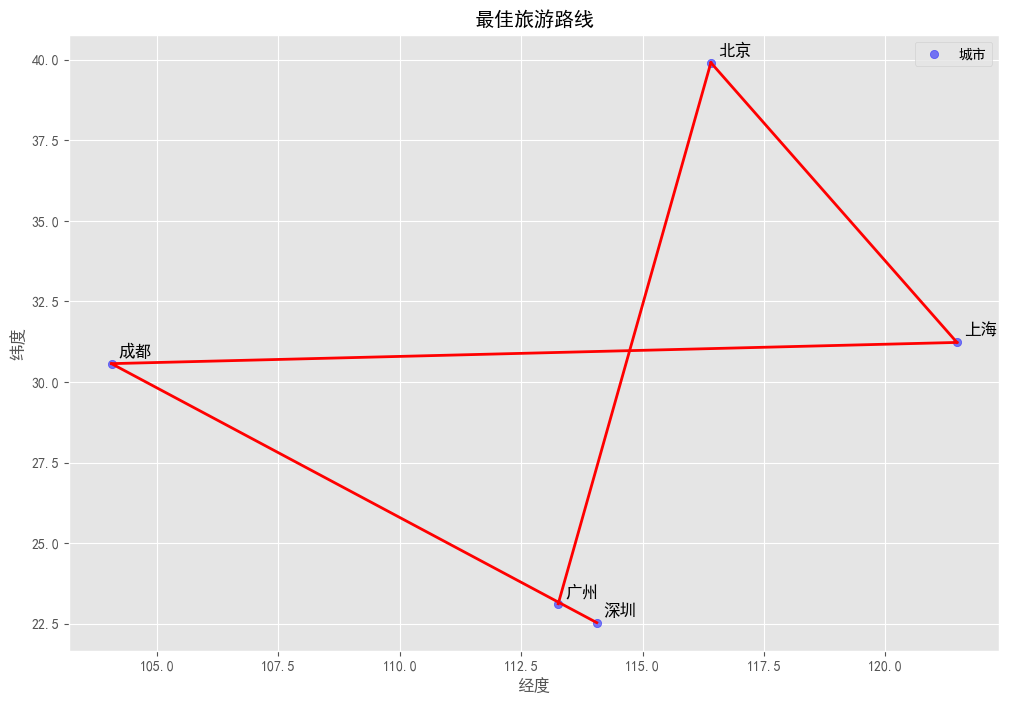

In [58]:
import matplotlib.pyplot as plt

# 创建示例数据
# 假设 `data` 是包含所有城市信息的 DataFrame
# `best_tour` 是最佳旅游路线中的城市顺序

# 创建一个简单的示例数据
data = pd.DataFrame({
    '城市': ['广州', '北京', '上海', '成都', '深圳'],
    'Longitude': [113.2644, 116.4074, 121.4737, 104.0668, 114.0579],
    'Latitude': [23.1291, 39.9042, 31.2304, 30.5728, 22.5431]
})

# 假设最佳路线
best_tour = ['广州', '北京', '上海', '成都', '深圳']

# 可视化路线
plt.figure(figsize=(12, 8))

# 绘制所有城市的散点图
plt.scatter(data['Longitude'], data['Latitude'], c='blue', alpha=0.5, label='城市')

# 绘制最佳旅游路线
for i in range(len(best_tour) - 1):
    city1, city2 = best_tour[i], best_tour[i+1]
    lon1, lat1 = data[data['城市'] == city1][['Longitude', 'Latitude']].values[0]
    lon2, lat2 = data[data['城市'] == city2][['Longitude', 'Latitude']].values[0]
    plt.plot([lon1, lon2], [lat1, lat2], 'r-', linewidth=2)

# 添加城市名称的标注
for city in best_tour:
    lon, lat = data[data['城市'] == city][['Longitude', 'Latitude']].values[0]
    plt.annotate(city, (lon, lat), xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title("最佳旅游路线")
plt.xlabel("经度")
plt.ylabel("纬度")
plt.legend()
plt.grid(True)
plt.show()

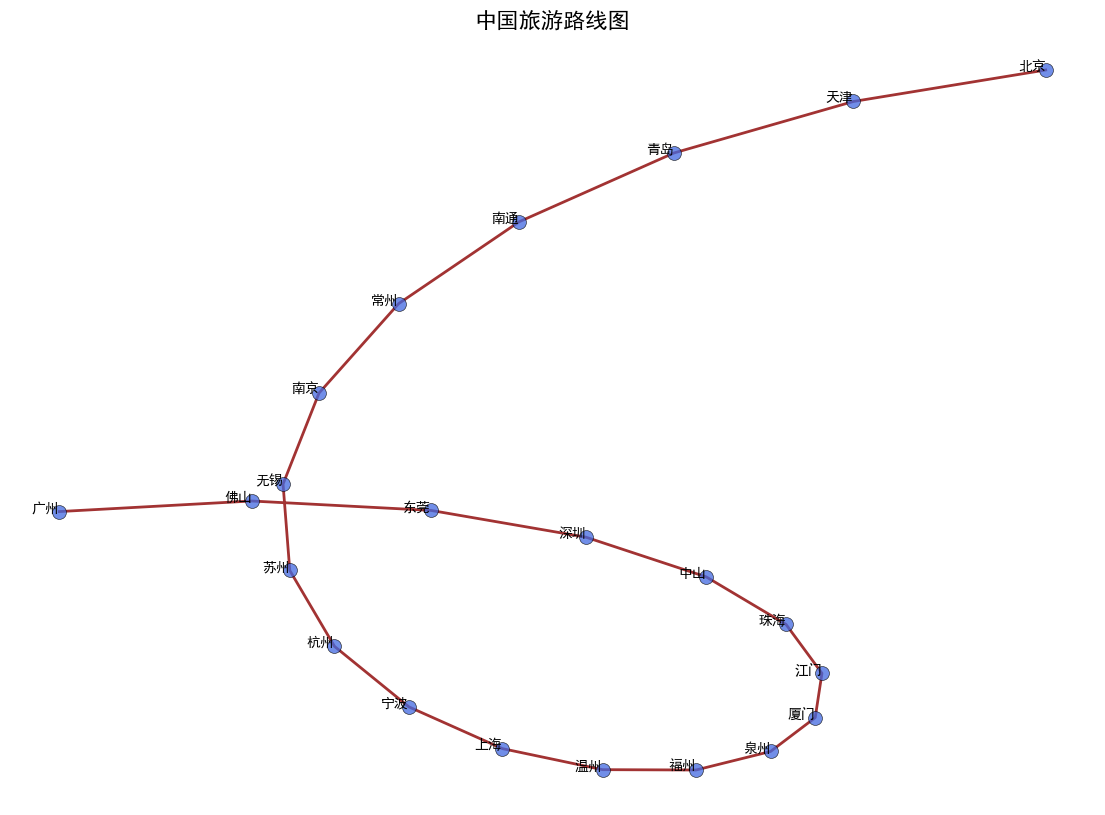

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# 地点和顺序
places = [
    '广州', '佛山', '东莞', '深圳', '中山', '珠海', '江门', '厦门', '泉州', 
    '福州', '温州', '上海', '宁波', '杭州', '苏州', '无锡', '南京', '常州', 
    '南通', '青岛', '天津', '北京'
]

# 生成简单的虚拟坐标（带有弯曲的路径）
np.random.seed(0)  # 设置随机种子以便重复性
t = np.linspace(0, 2 * np.pi, len(places))  # 参数t，用于生成弯曲的路径
x_coords = 10 * np.sin(t) + np.linspace(0, 20, len(places))  # x坐标，带有正弦波
y_coords = 8 * np.cos(t) + np.linspace(0, 15, len(places))  # y坐标，带有余弦波

# 创建绘图
plt.figure(figsize=(14, 10))

# 绘制地点
plt.scatter(x_coords, y_coords, color='royalblue', edgecolor='black', s=100, zorder=5, alpha=0.75, marker='o')  # 使用scatter绘制点
for i, place in enumerate(places):
    plt.text(x_coords[i], y_coords[i], place, fontsize=10, ha='right', color='black', zorder=10, fontweight='bold')

# 连接线
plt.plot(x_coords, y_coords, 'darkred', linestyle='-', linewidth=2, alpha=0.8, zorder=4)  # 使用plot绘制线

# 设置图表外观
plt.title('中国旅游路线图', fontsize=16, fontweight='bold')
plt.xlabel('虚拟坐标X', fontsize=12)
plt.ylabel('虚拟坐标Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('off')  # 关闭坐标轴
plt.show()

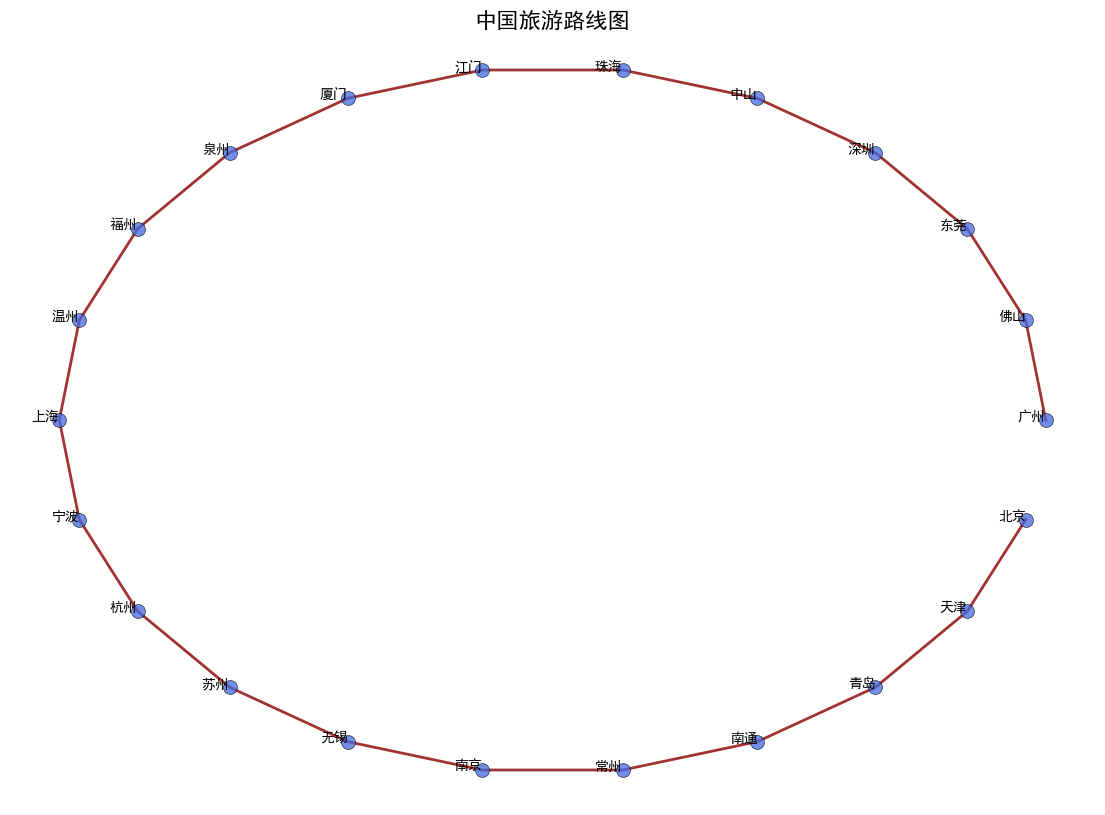

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 地点和顺序
places = [
    '广州', '佛山', '东莞', '深圳', '中山', '珠海', '江门', '厦门', '泉州', 
    '福州', '温州', '上海', '宁波', '杭州', '苏州', '无锡', '南京', '常州', 
    '南通', '青岛', '天津', '北京'
]

# 生成圆形坐标
num_places = len(places)
angles = np.linspace(0, 2 * np.pi, num_places, endpoint=False)
radius = 10

x_coords = radius * np.cos(angles)
y_coords = radius * np.sin(angles)

# 创建绘图
plt.figure(figsize=(14, 10))

# 绘制地点
plt.scatter(x_coords, y_coords, color='royalblue', edgecolor='black', s=100, zorder=5, alpha=0.75, marker='o')  # 使用scatter绘制点
for i, place in enumerate(places):
    plt.text(x_coords[i], y_coords[i], place, fontsize=10, ha='right', color='black', zorder=10, fontweight='bold')

# 连接线
# 连接线，不形成闭环
plt.plot(x_coords, y_coords, 'darkred', linestyle='-', linewidth=2, alpha=0.8, zorder=4)

# 设置图表外观
plt.title('中国旅游路线图', fontsize=16, fontweight='bold')
plt.xlabel('虚拟坐标X', fontsize=12)
plt.ylabel('虚拟坐标Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('off')  # 关闭坐标轴
plt.show()

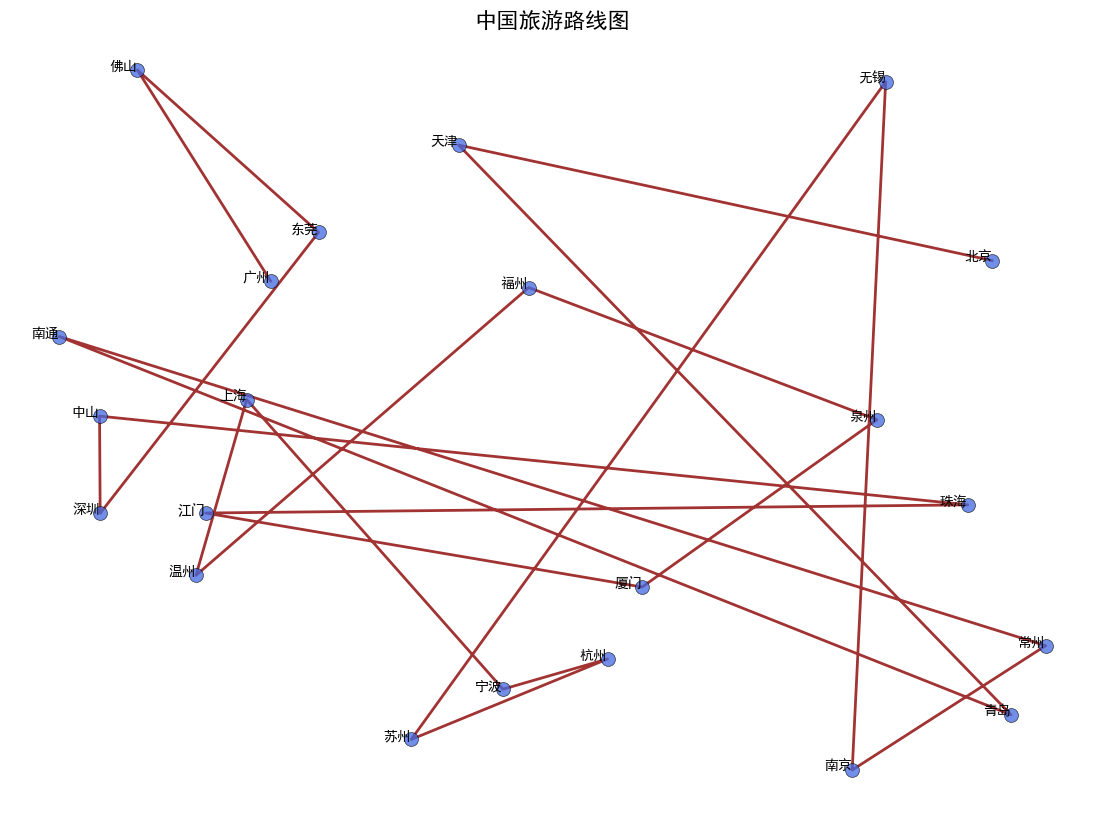

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# 地点和顺序
places = [
    '广州', '佛山', '东莞', '深圳', '中山', '珠海', '江门', '厦门', '泉州', 
    '福州', '温州', '上海', '宁波', '杭州', '苏州', '无锡', '南京', '常州', 
    '南通', '青岛', '天津', '北京'
]

# 随机生成坐标，确保点之间有一定的距离
num_places = len(places)
np.random.seed(0)  # 设置随机种子以便重复性

# 生成随机坐标，增加分布范围以减少点的重叠
x_coords = np.random.uniform(-15, 15, num_places)
y_coords = np.random.uniform(-15, 15, num_places)

# 检查点之间的距离
def check_distance(x, y, min_dist=2.0):
    """检查随机生成的点是否满足最小距离要求，如果不满足，重新生成"""
    distances = np.sqrt((x[:, None] - x[None, :])**2 + (y[:, None] - y[None, :])**2)
    np.fill_diagonal(distances, np.inf)  # 不计算点与自身的距离
    if np.min(distances) < min_dist:
        return False
    return True

# 确保点之间有一定的距离
while True:
    x_coords = np.random.uniform(-15, 15, num_places)
    y_coords = np.random.uniform(-15, 15, num_places)
    if check_distance(x_coords, y_coords):
        break

# 创建绘图
plt.figure(figsize=(14, 10))

# 绘制地点
plt.scatter(x_coords, y_coords, color='royalblue', edgecolor='black', s=100, zorder=5, alpha=0.75, marker='o')  # 使用scatter绘制点
for i, place in enumerate(places):
    plt.text(x_coords[i], y_coords[i], place, fontsize=10, ha='right', color='black', zorder=10, fontweight='bold')

# 连接线
# 连接线，不形成闭环
plt.plot(x_coords, y_coords, 'darkred', linestyle='-', linewidth=2, alpha=0.8, zorder=4)

# 设置图表外观
plt.title('中国旅游路线图', fontsize=16, fontweight='bold')
plt.xlabel('虚拟坐标X', fontsize=12)
plt.ylabel('虚拟坐标Y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('off')  # 关闭坐标轴
plt.show()

### 数据预处理流程

In [63]:
import os
import pandas as pd
import glob

# 设置包含所有 CSV 文件的文件夹路径
folder_path = r'./C题/附件'

# 使用 glob 模块获取文件夹中所有的 CSV 文件
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# 创建一个空列表来存储所有的 DataFrame
dfs = []

# 创建一个列表来存储完全缺失数据的城市
missing_cities = []

# 循环读取每个 CSV 文件
for file in csv_files:
    # 读取 CSV 文件
    try:
        df = pd.read_csv(file, encoding='utf-8')
        
        # 添加一个新列来表示城市名（从文件名中提取）
        city_name = os.path.basename(file).split('.')[0]
        df['城市'] = city_name
        
        # 检查是否仅包含表头而没有数据
        if df.shape[0] == 0:  # 没有数据行
            missing_cities.append(city_name)
        else:
            # 将 DataFrame 添加到列表中
            dfs.append(df)

    except Exception as e:
        print(f"Error processing file {file}: {str(e)}")
        missing_cities.append(os.path.basename(file).split('.')[0])

# 将所有 DataFrame 合并为一个
combined_df = pd.concat(dfs, ignore_index=True)

# 重新排列列，使 '城市' 列位于第一列
columns = ['城市'] + [col for col in combined_df.columns if col != '城市']
combined_df = combined_df[columns]

# 打印完全缺失数据的城市
print("仅包含表头而没有数据的城市:")
for city in missing_cities:
    print(city)

print("城市个数:", len(missing_cities))

仅包含表头而没有数据的城市:
昆玉
泰州
阿拉善盟
城市个数: 3


In [64]:
# 统计唯一城市的数量
unique_city_count = combined_df["城市"].nunique()

print(f"一共对应的城市数量: {unique_city_count}")

一共对应的城市数量: 349


In [65]:
# 删除不需要的特征
columns_to_drop = ['图片链接', 'Page','地址','介绍','开放时间','评分','建议游玩时间','建议季节','门票','小贴士']
combined_df.drop(columns=columns_to_drop, inplace=True)

In [66]:
# 去除完全重复的景点
combined_df = combined_df.drop_duplicates(subset=['城市', '名字'], keep='first')

# 查看处理后的 DataFrame
print(combined_df.head())

    城市       名字                                                 链接
0  七台河      石龙山     http://travel.qunar.com/p-oi722435-shilongshan
1  七台河      西大圈        http://travel.qunar.com/p-oi722436-xidaquan
2  七台河      挠力河       http://travel.qunar.com/p-oi38035216-naolihe
3  七台河      仙湖洞    http://travel.qunar.com/p-oi37167118-xianhudong
4  七台河  七台河市博物馆  http://travel.qunar.com/p-oi36258422-qitaihesh...


In [68]:
combined_df = pd.read_csv('./C题/中间过程/unique_attractions.csv')

# 去掉“名字”列
df_without_names = combined_df.drop(columns=['名字'])

# 按城市分组，计算景点数和最高评分
city_summary = df_without_names.groupby('城市').agg(
    景点数=('评分', 'count'),  # 计算每个城市的景点数
    最高评分=('评分', 'max')   # 计算每个城市的最高评分
).reset_index()

# 去除最高评分为 NaN 的行
city_summary = city_summary.dropna(subset=['最高评分'])

# 按最高评分降序排列，如果相同则按景点数降序排列
city_summary = city_summary.sort_values(by=['最高评分', '景点数'], ascending=[False, False])

# 查看结果
print(city_summary)

       城市  景点数  最高评分
6      上海   98   5.0
175    杭州   97   5.0
211    深圳   97   5.0
103    宁波   95   5.0
159    无锡   95   5.0
..    ...  ...   ...
264    莱芜    1   4.5
117    屯昌   10   4.3
62   可克达拉    2   0.0
306   铁门关    2   0.0
49     北屯    1   0.0

[344 rows x 3 columns]


In [70]:
merged_df = pd.read_csv('./C题/合并数据8.5.csv')

# 获取城市列表
merged_cities = set(merged_df['城市'])
summary_cities = set(city_summary['城市'])

# 找出缺少的城市
missing_cities = summary_cities - merged_cities

# 输出缺少的城市
if missing_cities:
    print("缺少的城市：")
    print(missing_cities)
else:
    print("所有城市都在合并8.5.csv中。")

所有城市都在合并8.5.csv中。


In [71]:
# 选择最高评分为 5.0 的城市
high_score_cities = city_summary[city_summary["最高评分"] == 5.0]

# 导出为 CSV 文件
high_score_cities.to_csv("high_score_cities.csv", index=False)

print("导出成功，文件名为 high_score_cities.csv")

导出成功，文件名为 high_score_cities.csv


In [72]:
high_score_cities

,城市,景点数,最高评分
6,上海,98,5.0
175,杭州,97,5.0
211,深圳,97,5.0
103,宁波,95,5.0
159,无锡,95,5.0
...,...,...,...
331,青木川,9,5.0
323,阿拉尔,8,5.0
26,五家渠,6,5.0
86,图木舒克,2,5.0


In [77]:
# 读取城市分级 CSV 文件
city_levels = pd.read_csv('./C题/中间过程/城市分级.csv')

# 创建一个字典用于城市等级查找
city_level_dict = dict(zip(city_levels['城市'], city_levels['城市等级']))

# 使用 apply 函数添加新列
city_summary['城市分级'] = city_summary['城市'].apply(lambda x: city_level_dict.get(x, '未知'))

# 保存结果
city_summary.to_csv('updated_city_summary.csv', index=False)

In [78]:
# 读取 CSV 文件
df = pd.read_csv('./C题/中间过程/所有城市分级.csv')

# 按照城市分级和景点数进行排序
sorted_df = df.sort_values(by=['城市分级', '景点数'], ascending=[True, False])

# 输出排序后的结果
print(sorted_df)
sorted_df.to_csv("按照城市分级排序.csv")

     城市  景点数  最高评分   城市分级
0    上海   98   5.0   一线城市
2    深圳   97   5.0   一线城市
23   广州   89   5.0   一线城市
48   北京   79   5.0   一线城市
12   扬州   91   5.0   三线城市
..   ..  ...   ...    ...
335  郑州   85   4.8  新一线城市
84   天津   72   5.0  新一线城市
102  东莞   68   5.0  新一线城市
103  合肥   68   5.0  新一线城市
204  巢湖   50   5.0  新一线城市

[344 rows x 4 columns]


爬虫时拆分文件，分开爬

In [81]:
import csv

# 输入和输出文件名
input_file = './C题/cities.csv'  # 替换为你的输入文件名
output_prefix = 'output_'  # 输出文件前缀

# 读取输入 CSV 文件
with open(input_file, 'r', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # 读取表头

    # 初始化文件计数器和行计数器
    file_count = 1
    row_count = 0
    current_output_file = f"{output_prefix}{file_count}.csv"

    # 创建第一个输出文件
    outfile = open(current_output_file, 'w', newline='', encoding='utf-8')
    writer = csv.writer(outfile)
    writer.writerow(header)  # 写入表头

    for row in reader:
        if row_count < 50:
            writer.writerow(row)  # 写入当前文件
            row_count += 1
        else:
            # 关闭当前文件并打开新文件
            outfile.close()
            file_count += 1
            current_output_file = f"{output_prefix}{file_count}.csv"
            outfile = open(current_output_file, 'w', newline='', encoding='utf-8')
            writer = csv.writer(outfile)
            writer.writerow(header)  # 写入表头
            writer.writerow(row)  # 写入新文件的第一行
            row_count = 1  # 重置行计数器

    # 关闭最后一个文件
    outfile.close()

print(f"拆分完成，共生成 {file_count} 个文件。")

拆分完成，共生成 7 个文件。


In [82]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('./C题/筛选后的山景景点.csv')

# 检查数据类型，确保空值是NaN
df.info()

# 定义一个函数来计算每行的空值数量
def count_nulls(row):
    return row.isnull().sum()

# 应用该函数并创建一个新的列
df['null_count'] = df.apply(count_nulls, axis=1)

# 按照城市分组，并选择空值最少的行
unique_cities = df.groupby('城市', as_index=False).apply(lambda x: x.loc[x['null_count'].idxmin()])

# 移除添加的辅助列
unique_cities.drop('null_count', axis=1, inplace=True)

# 显示结果
print(unique_cities)

# 将结果保存到新的CSV文件
unique_cities.to_csv('unique_cities.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   城市      570 non-null    object
 1   名字      570 non-null    object
 2   链接      570 non-null    object
dtypes: object(3)
memory usage: 13.5+ KB
       城市   名字                                                 链接
0     七台河  石龙山     http://travel.qunar.com/p-oi722435-shilongshan
1      万宁  神龟山     http://travel.qunar.com/p-oi709591-shenguishan
2      三明  龙泉山    http://travel.qunar.com/p-oi704649-longquanshan
3     三门峡   韶峰        http://travel.qunar.com/p-oi713298-shaofeng
4      上饶   圭峰         http://travel.qunar.com/p-oi713992-guifeng
..    ...  ...                                                ...
219    黄石  龙角山  http://travel.qunar.com/p-oi38667226-longjiaoshan
220   黔东南  金钟山    http://travel.qunar.com/p-oi714465-jinzhongshan
221    黔南  瑶人山     http://travel.qunar.com/p-oi3864542-yaorenshan
222  齐齐哈尔  蛇洞山 

C:\Users\25705\AppData\Local\Temp\ipykernel_34560\1800723348.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unique_cities = df.groupby('城市', as_index=False).apply(lambda x: x.loc[x['null_count'].idxmin()])
